In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import matplotlib as mpl
from sklearn.linear_model import Ridge
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

import scipy.spatial.distance as spd
import ResidualDecomposition as RD

np.random.seed(0)

In [2]:
data = pd.read_csv("Datasets/P_BostonHousing.csv", header=None) 
X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values
X.shape

(506, 12)

In [3]:
# lr = RandomForestRegressor(n_estimators=100, max_depth=7)
# lr.fit(X, Y)

# t1 = time.time()

# rcomposition_model = RD.ResidualDecompositionSymmetric()
# rcomposition_model.fit(X, Y, lr, 500)
# rcomposition = rcomposition_model.get_composition()
# rcontribution = rcomposition_model.get_contribution()

# t2 = time.time()

In [4]:
# lr = RandomForestRegressor(n_estimators=100, max_depth=7)
# lr.fit(X, Y)

# t1 = time.time()

# rshap_model = class_files.residual_shap_MC(X, Y, lr, niter=1000)
# rshap = rshap_model.phi

# t2 = time.time()

In [5]:
rshap = np.genfromtxt("Data/RSHAP_Boston_RF100.csv", delimiter=',')

In [6]:
rpred = np.sum(rshap, axis=0)

rshap_norm = ((rshap.T * -np.sign(rpred))).T 

r_contribution = ((rshap.T * -np.sign(rpred))).T 

In [7]:
rshap.shape, X.shape

((506, 506), (506, 12))

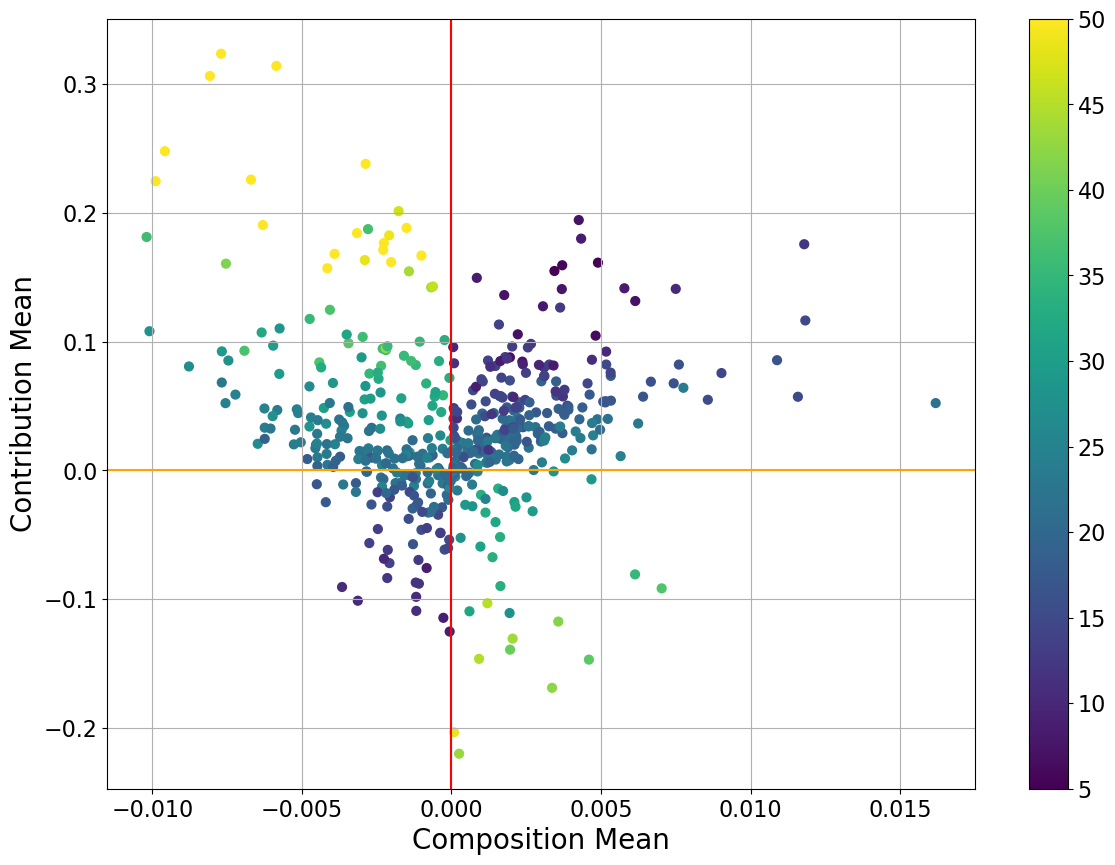

In [8]:
plt.figure(figsize=(14,10))

plt.scatter(np.mean(rshap, axis=0), np.mean(r_contribution, axis=1), c=Y, s=40)

plt.grid(True)

plt.xlabel("Composition Mean", fontsize=20)
plt.ylabel("Contribution Mean", fontsize=20)
plt.axvline(0, c='red')
plt.axhline(0, c='orange')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=16)

plt.savefig("Figures/boston_rshap_rf_100.pdf", bbox_inches='tight')

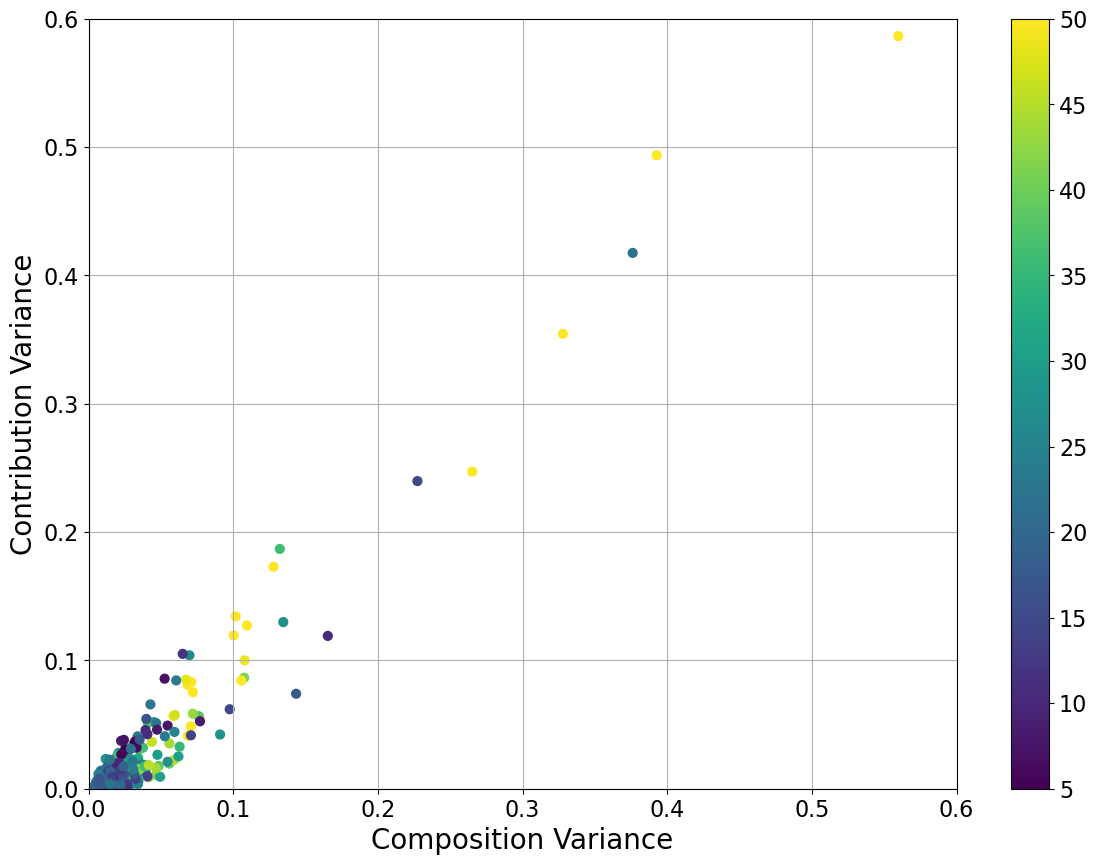

In [9]:
plt.figure(figsize=(14,10))

plt.scatter(np.var(rshap, axis=0), np.var(r_contribution, axis=1), c=Y, s=40)

plt.grid(True)

plt.xlabel("Composition Variance", fontsize=20)
plt.ylabel("Contribution Variance", fontsize=20)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=16)
plt.xlim([0,0.6])
plt.ylim([0,0.6])

plt.savefig("Figures/boston_rshap_rf_100_var.pdf", bbox_inches='tight')

In [10]:
370 / 60

6.166666666666667

In [11]:
iso_forest = IsolationForest(n_estimators=1000)
iso_forest.fit(rshap)
iso_predicted = iso_forest.predict(rshap)
composition_outliers = np.where(iso_predicted == -1)

iso_forest = IsolationForest(n_estimators=1000)
iso_forest.fit(r_contribution)
iso_predicted = iso_forest.predict(r_contribution)
contribution_outliers = np.where(iso_predicted == -1)

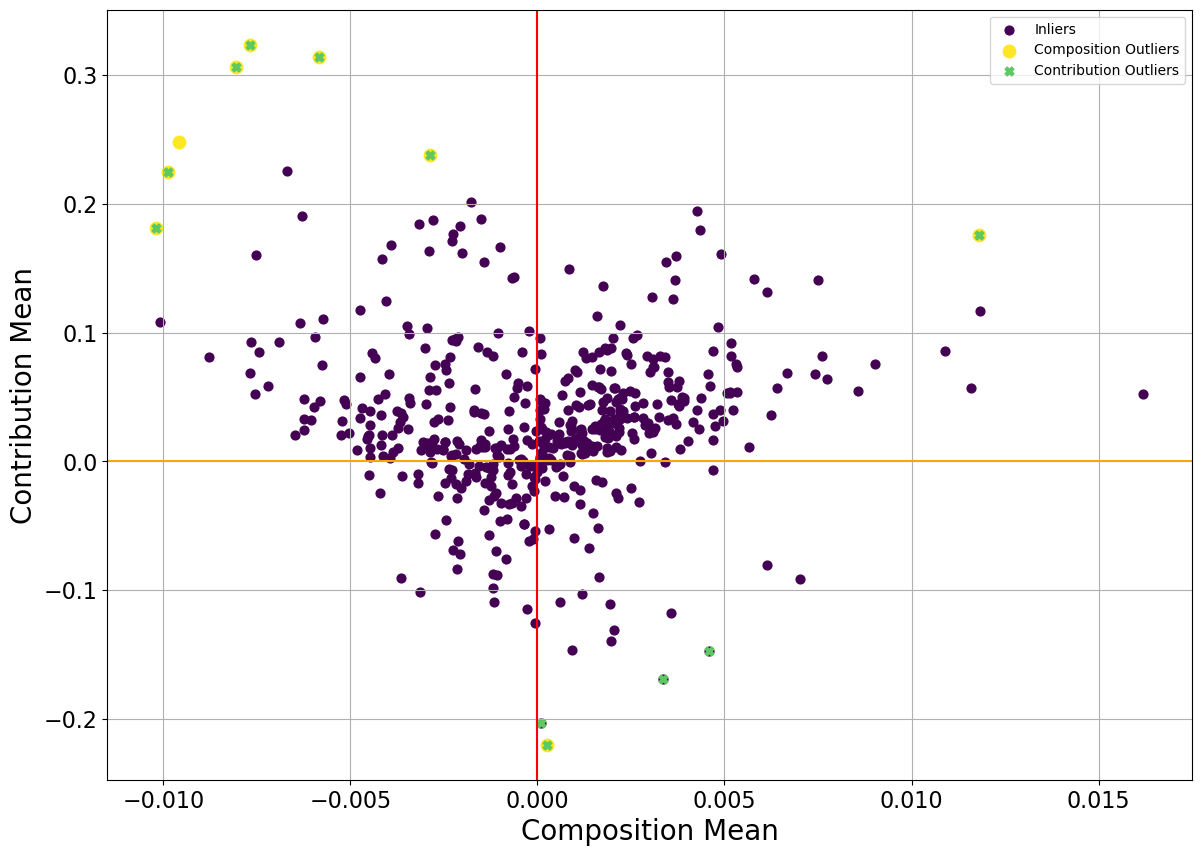

In [12]:
plt.figure(figsize=(14,10))

plt.xlabel("Composition Mean", fontsize=20)
plt.ylabel("Contribution Mean", fontsize=20)
plt.axvline(0, c='red')
plt.axhline(0, c='orange')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.scatter(np.mean(rshap, axis=0), np.mean(r_contribution, axis=1), c='#440154', s=40, label='Inliers')
plt.scatter(np.mean(rshap, axis=0)[composition_outliers], np.mean(r_contribution, axis=1)[composition_outliers],\
            c='#fde725', marker='o', s=80, label='Composition Outliers')
plt.scatter(np.mean(rshap, axis=0)[contribution_outliers], np.mean(r_contribution, axis=1)[contribution_outliers],\
            c='#5ec962', marker='X', s=40, label='Contribution Outliers')

plt.legend()
plt.grid(True)

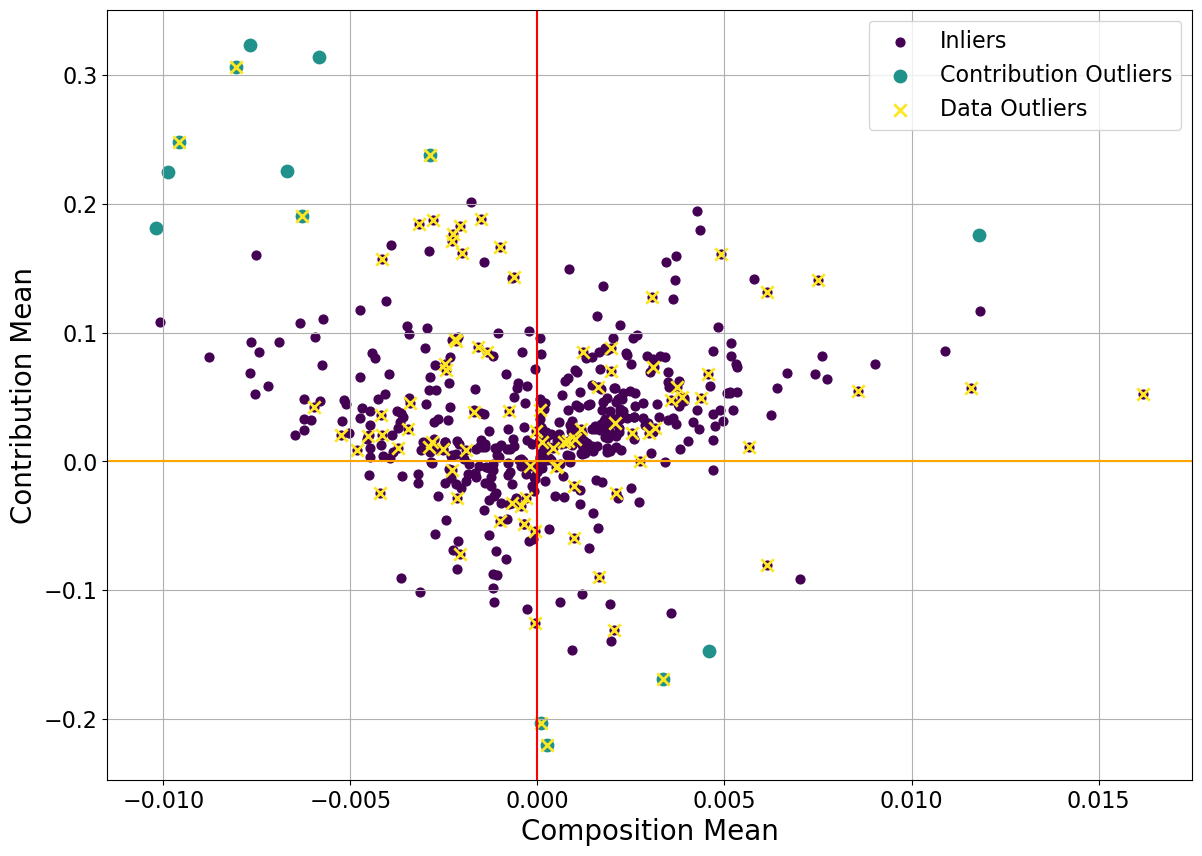

In [13]:

iso_forest = IsolationForest(n_estimators=100)
iso_predicted = iso_forest.fit_predict(r_contribution)
contribution_outliers = np.where(iso_predicted == -1)

iso_forest = IsolationForest(n_estimators=100)
iso_predicted = iso_forest.fit_predict(X)
data_outliers = np.where(iso_predicted == -1)

plt.figure(figsize=(14,10))

plt.xlabel("Composition Mean", fontsize=20)
plt.ylabel("Contribution Mean", fontsize=20)
plt.axvline(0, c='red')
plt.axhline(0, c='orange')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.scatter(np.mean(rshap, axis=0), np.mean(r_contribution, axis=1), c='#440154', s=40, label='Inliers')
plt.scatter(np.mean(rshap, axis=0)[contribution_outliers], np.mean(r_contribution, axis=1)[contribution_outliers],\
            c='#21918c', marker='o', s=80, label='Contribution Outliers')
plt.scatter(np.mean(rshap, axis=0)[data_outliers], np.mean(r_contribution, axis=1)[data_outliers],\
            c='#fde725', marker='x', s=80, linewidths=2, label='Data Outliers')

plt.legend(fontsize=16)
plt.grid(True)

plt.savefig("Figures/boston_outliers_rf100.pdf", bbox_inches='tight')

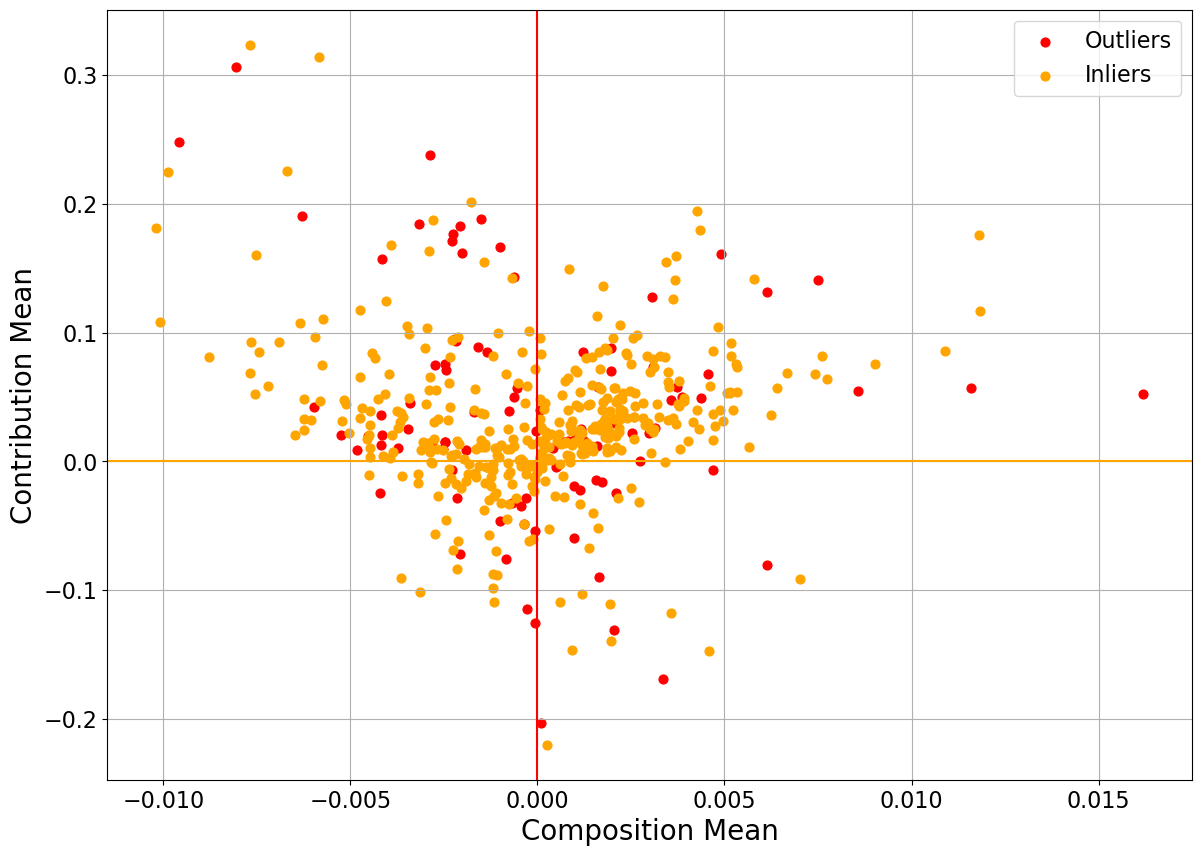

In [14]:
iso_forest = IsolationForest(n_estimators=1000)
iso_forest.fit(X)

iso_predicted = iso_forest.predict(X)

iso_int = np.where(iso_predicted == -1)
iso_out = np.where(iso_predicted == 1)

plt.figure(figsize=(14,10))

plt.xlabel("Composition Mean", fontsize=20)
plt.ylabel("Contribution Mean", fontsize=20)
plt.axvline(0, c='red')
plt.axhline(0, c='orange')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.scatter(np.mean(rshap, axis=0)[iso_int], np.mean(r_contribution, axis=1)[iso_int], c='r', s=40, label='Outliers')
plt.scatter(np.mean(rshap, axis=0)[iso_out], np.mean(r_contribution, axis=1)[iso_out], c='orange', s=40, label='Inliers')
plt.legend(fontsize=16)

plt.grid(True)

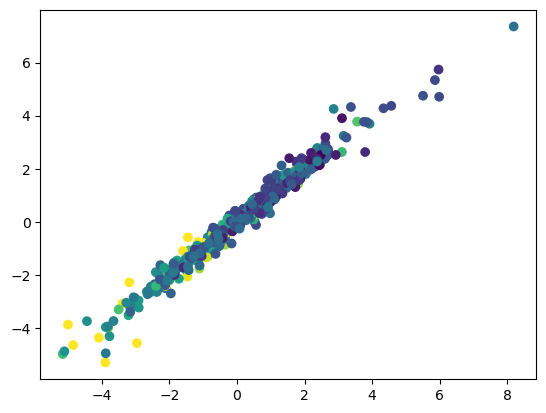

In [15]:
lr = RandomForestRegressor(n_estimators=100, max_depth=7)
lr.fit(X, Y)

res = lr.predict(X) - Y

plt.scatter(np.sum(rshap, axis=0), res, c=Y)

In [16]:
Y[180]

39.8

In [17]:
maxres = np.argsort(np.abs(res))

In [18]:
np.max(np.abs(res))

7.3583000000000425

In [19]:
maxres[0], maxres[-1]

(303, 364)

In [20]:
np.linalg.eig(

SyntaxError: incomplete input (1146637266.py, line 1)

In [ ]:
diag = np.arange(0, X.shape[0])
plt.xlabel("Self Contribution")
plt.ylabel("Residual")

plt.scatter(r_contribution[diag,diag] / np.sum(np.abs(rshap), axis=1), res, c=Y)

In [ ]:
cmap = mpl.cm.get_cmap("viridis")

plt.figure(figsize=(20, 6))

i_instance = 364

i_residual = res[i_instance]
print(Y[i_instance])

composition_values = rshap[:,i_instance]
composition_orders = np.argsort(composition_values)
composition_ordered = composition_values[composition_orders]
Y_ordered = Y[composition_orders]

less_zero = np.where(composition_ordered < 0)[0]
more_zero = np.where(composition_ordered > 0)[0]  
current_Y = np.sum(composition_ordered[less_zero])

for i in range(0, more_zero.shape[0]):
    current_index = more_zero[i]
    current_height = np.abs(composition_ordered[current_index])
    Y_color = cmap(Y_ordered[current_index] / 50)
    plt.barh(0, current_height, 0.1, current_Y, color=Y_color)
    current_Y += current_height
    
plt.axvline(current_Y, c='r', linewidth=5)

for i in range(0, less_zero.shape[0]):
    current_index = less_zero[i]
    current_height = np.abs(composition_ordered[current_index])
    Y_color = cmap(Y_ordered[current_index] / 50)
    plt.barh(0, current_height, 0.1, current_Y, color=Y_color)
    current_Y += current_height
    
plt.xlabel("Residual Value", fontsize=24)
plt.xticks(fontsize=20)
plt.yticks([])

from matplotlib.cm import ScalarMappable
sm = ScalarMappable(cmap=cmap, norm=plt.Normalize(0,50))
sm.set_array([])

plt.barh(0,0, 0.15)

cbar = plt.colorbar(sm)
cbar.set_label('Y-Value of Contributing Instance', rotation=270,labelpad=25, fontsize=24)
cbar.ax.tick_params(labelsize=20)
plt.xlim(-35, 40)

plt.savefig("Figures/ForceBoston_i364.pdf", bbox_inches='tight')

In [ ]:
cmap = mpl.cm.get_cmap("viridis")

plt.figure(figsize=(20, 6))

i_instance = 261

i_residual = res[i_instance]

print(Y[i_instance])

composition_values = rshap[:,i_instance]
composition_orders = np.argsort(composition_values)
composition_ordered = composition_values[composition_orders]
Y_ordered = Y[composition_orders]

less_zero = np.where(composition_ordered < 0)[0]
more_zero = np.where(composition_ordered > 0)[0]  
current_Y = np.sum(composition_ordered[less_zero])

for i in range(0, more_zero.shape[0]):
    current_index = more_zero[i]
    current_height = np.abs(composition_ordered[current_index])
    Y_color = cmap(Y_ordered[current_index] / 50)
    plt.barh(0, current_height, 0.1, current_Y, color=Y_color)
    current_Y += current_height
    
plt.axvline(current_Y, c='r', linewidth=5)

for i in range(0, less_zero.shape[0]):
    current_index = less_zero[i]
    current_height = np.abs(composition_ordered[current_index])
    Y_color = cmap(Y_ordered[current_index] / 50)
    plt.barh(0, current_height, 0.1, current_Y, color=Y_color)
    current_Y += current_height
    
plt.xlabel("Residual Value", fontsize=24)
plt.xticks(fontsize=20)
plt.yticks([])

from matplotlib.cm import ScalarMappable
sm = ScalarMappable(cmap=cmap, norm=plt.Normalize(0,50))
sm.set_array([])

plt.barh(0,0, 0.15)

cbar = plt.colorbar(sm)
cbar.set_label('Y-Value of Contributing Instance', rotation=270,labelpad=25, fontsize=24)
cbar.ax.tick_params(labelsize=20)
plt.xlim(-35, 35)

plt.savefig("Figures/ForceBoston_i261.pdf", bbox_inches='tight')